
sin関数にノイズを加えたものを訓練用データとし、未来の値を予測させる。


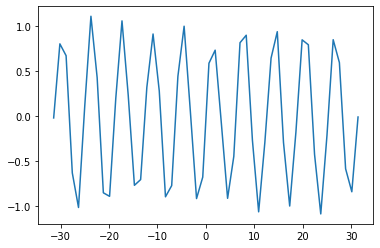

(40, 10, 1)
(40, 10, 1)


In [1]:
#訓練用データの作成

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-10*np.pi, 10*np.pi)  # -10πから10πまで
sin_data = np.sin(x_data)  + 0.1*np.random.randn(len(x_data))  # sin関数に乱数でノイズを加える

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10  # 時系列の数
n_sample = len(x_data)-n_rnn  # サンプル数
x = np.zeros((n_sample, n_rnn))  # 入力
t = np.zeros((n_sample, n_rnn))  # 正解
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1]  # 時系列を入力よりも一つ後にずらす

x = x.reshape(n_sample, n_rnn, 1)  # KerasにおけるRNNでは、入力を（サンプル数、時系列の数、入力層のニューロン数）にする
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)  # 今回は入力と同じ形状
print(t.shape)

In [2]:
#RNNの構築

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 8  # バッチサイズ
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

model = Sequential()
# SimpleRNN層の追加。return_sequenceをTrueにすると、時系列の全てのRNN層が出力を返す。
# return_sequenceをTrueをFalseにすると、最後のRNN層のみが出力を返す。
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")  # 誤差は二乗誤差、最適化アルゴリズムはSGD
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10, 20)            440       
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
#学習

history = model.fit(x, t, epochs=20, batch_size=batch_size, validation_split=0.1)

Train on 36 samples, validate on 4 samples
Epoch 1/20
36/36 [==============================] - 1s 19ms/step - loss: 0.7548 - val_loss: 0.4324
Epoch 2/20
36/36 [==============================] - 0s 665us/step - loss: 0.3910 - val_loss: 0.2345
Epoch 3/20
36/36 [==============================] - 0s 609us/step - loss: 0.2326 - val_loss: 0.1496
Epoch 4/20
36/36 [==============================] - 0s 637us/step - loss: 0.1632 - val_loss: 0.1160
Epoch 5/20
36/36 [==============================] - 0s 582us/step - loss: 0.1336 - val_loss: 0.1003
Epoch 6/20
36/36 [==============================] - 0s 582us/step - loss: 0.1193 - val_loss: 0.0921
Epoch 7/20
36/36 [==============================] - 0s 582us/step - loss: 0.1122 - val_loss: 0.0861
Epoch 8/20
36/36 [==============================] - 0s 665us/step - loss: 0.1081 - val_loss: 0.0836
Epoch 9/20
36/36 [==============================] - 0s 582us/step - loss: 0.1053 - val_loss: 0.0833
Epoch 10/20
36/36 [==============================] - 0s 63

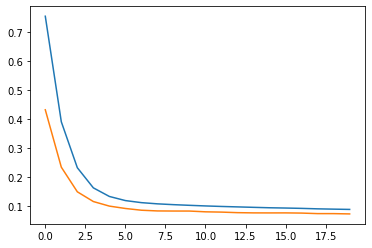

In [4]:
#誤差の推移

loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

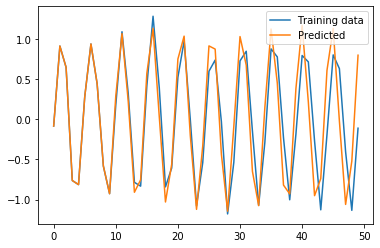

In [5]:
#サイン関数の次の値の予測

predicted = x[0].reshape(-1)  # 最初の入力。reshape(-1)で一次元のベクトルにする。

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))  # 直近のデータを使って予測を行う
    predicted = np.append(predicted, y[0][n_rnn-1][0])  # 出力の最後の結果をpredictedに追加する

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()